In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
title_basics = pd.read_csv('Data/title.basics.csv')

In [3]:
title_basics.start_year.describe()

count    146144.000000
mean       2014.621798
std           2.733583
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2115.000000
Name: start_year, dtype: float64

In [4]:
title_basics.dropna(subset=['genres'],inplace=True)
genre_counts = {}
for genrelist in title_basics['genres']:
    genrelist = genrelist.split(',')
    for genre in genrelist:
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

In [5]:
sorted_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

In [298]:
import itertools
top10 = dict(itertools.islice(sorted_genres.items(), 10)) 
top10
top10genres = list(top10.keys())

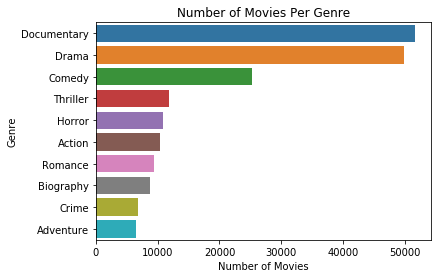

In [299]:
sns.barplot(list(top10.values()), list(top10.keys()))
plt.ylabel('Genre')
plt.xlabel('Number of Movies')
plt.title('Number of Movies Per Genre')
plt.show()

In [257]:
rt_df = pd.read_table('Data/rt.movie_info.tsv')
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [258]:
rt_df = rt_df.dropna(subset=['genre','dvd_date','box_office'])

In [259]:
def to_year_only(entry):
    return str(entry)[-4:]

def to_int_only(entry):
    return int(entry.replace(',',''))

In [260]:
rt_df['theater_date'] = [to_year_only(d) for d in rt_df.theater_date]

In [261]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012,"Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002,"Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006,"Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010,"Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010,"Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures


In [262]:
rt_df['box_office'] = [to_int_only(c) for c in rt_df.box_office]

In [263]:
rt_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012,"Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002,"Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006,"Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010,"Nov 9, 2010",$,134904,117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010,"Apr 5, 2011",$,1039869,108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,2005,"Dec 20, 2005",$,25335935,119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,2012,"Nov 20, 2012",$,1416189,129 minutes,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,2007,"Oct 9, 2007",$,59371,98 minutes,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,2002,"Oct 7, 2003",$,794306,97 minutes,NaN


In [264]:
genres = ['Documentary', 'Drama', 'Comedy']

In [265]:
documentary_df = rt_df[rt_df['genre'].str.contains("Documentary")]

In [266]:
sorted(list(documentary_df.theater_date.unique()))

['2002', '2003', '2007', '2009', '2010', '2011', '2012', '2013', '2017']

In [267]:
drama_df = rt_df[rt_df['genre'].str.contains('Drama')]

In [268]:
comedy_df = rt_df[rt_df['genre'].str.contains('Comedy')]

In [281]:
def gross_per_year(df):
    gross_info = {}
    years = sorted(list(df.theater_date.unique()))
    for year in years:
        year_group = df[df['theater_date']==year]
        total = sum(year_group.box_office)
        gross_info[str(year)] = total
    return gross_info

In [300]:
genres_gross_info = {}
for genre in top10genres:
    genre_df = rt_df[rt_df['genre'].str.contains(genre)]
    genre_gross_info[str(genre)] = gross_per_year(genre_df)

In [301]:
genre_gross_info

{'Documentary': {'2002': 64209101,
  '2003': 16443233,
  '2007': 598103,
  '2009': 73614405,
  '2010': 21930339,
  '2011': 410077,
  '2012': 104286,
  '2013': 419361,
  '2017': 118253},
 'Drama': {'1958': 109257,
  '1974': 8300,
  '1985': 33200000,
  '1990': 119000000,
  '1992': 32000000,
  '1998': 2365931,
  '2000': 187320284,
  '2001': 197000602,
  '2002': 261391943,
  '2003': 590714367,
  '2004': 758246634,
  '2005': 330836419,
  '2006': 483557587,
  '2007': 216501576,
  '2008': 610385977,
  '2009': 377783505,
  '2010': 240250223,
  '2011': 491491634,
  '2012': 21937607,
  '2013': 163455972,
  '2014': 69551399,
  '2015': 115369064,
  '2016': 113081351,
  '2017': 184235449,
  '2018': 35003216},
 'Comedy': {'1974': 8300,
  '1998': 2365931,
  '2000': 287077967,
  '2001': 209770163,
  '2002': 550137311,
  '2003': 307148317,
  '2004': 517101721,
  '2005': 357206764,
  '2006': 581383066,
  '2007': 462289492,
  '2008': 430170409,
  '2009': 402981383,
  '2010': 181958088,
  '2011': 33721238

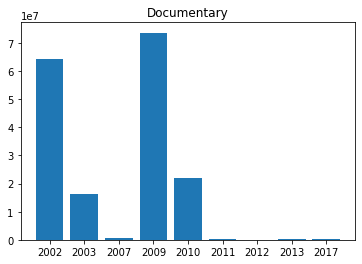

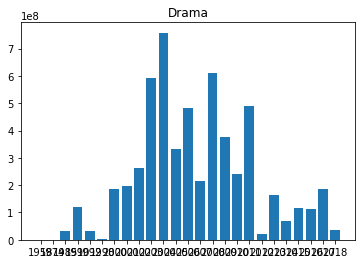

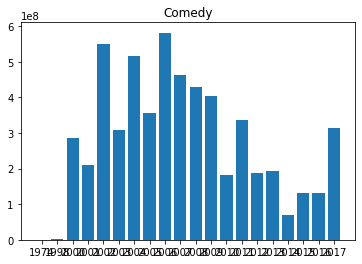

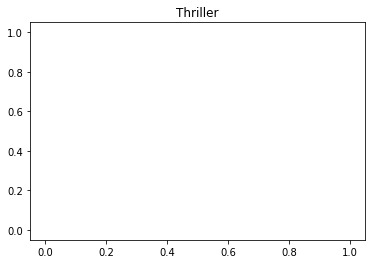

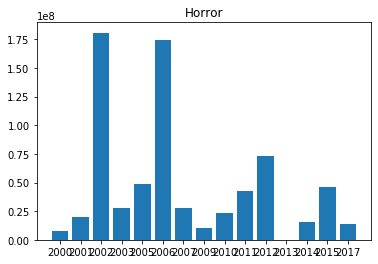

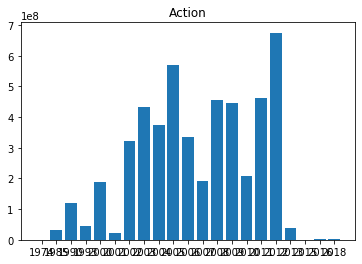

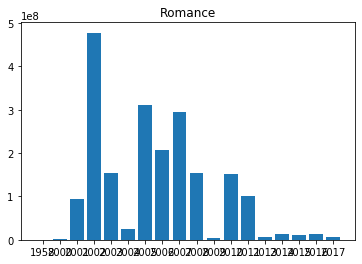

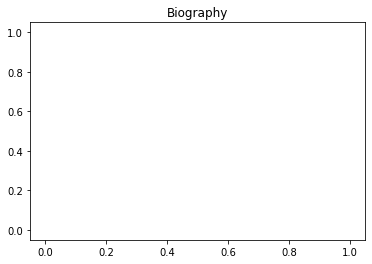

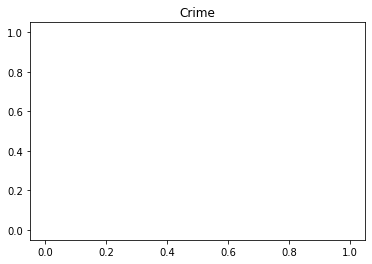

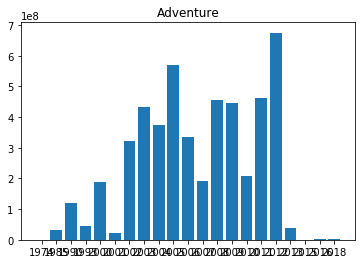

In [319]:
genre_gross_info['Documentary'].keys()
for genre in genre_gross_info:
    plt.bar(genre_gross_info[genre].keys(),
            genre_gross_info[genre].values())
    plt.title(genre)
    plt.show()

177847158


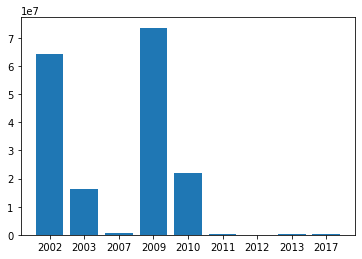

In [293]:
plt.bar(documentary_gross.keys(), documentary_gross.values())
print(sum(documentary_gross.values()))

5634798297


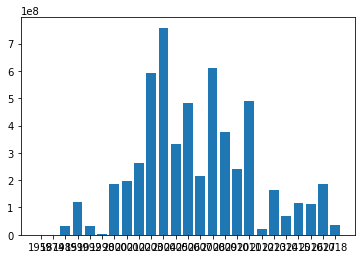

In [294]:
plt.bar(drama_gross.keys(), drama_gross.values())
print(sum(drama_gross.values()))

5653296431


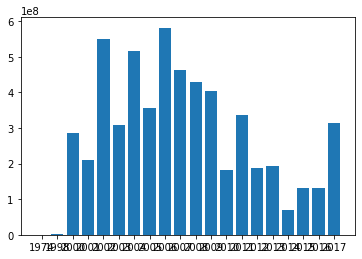

In [295]:
plt.bar(comedy_gross.keys(), comedy_gross.values())
print(sum(comedy_gross.values()))